In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


file_path = '/content/income.csv'
df = pd.read_csv(file_path)

display(df.head())
df.info()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
df.info()
print(df.isnull().sum())
df_cleaned = df.dropna()
print("\nSetelah dibersihkan:")
print(df_cleaned.isnull().sum())

df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
age                 0
workclass         963
fnlwgt              0
education           0
educa

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_ml = df_cleaned.copy()

label_encoders = {}
for column in df_ml.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_ml[column] = le.fit_transform(df_ml[column])
    label_encoders[column] = le
X = df_ml.drop('income', axis=1)
y = df_ml['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (38096, 14)
Test set shape: (9525, 14)


In [8]:
#Model K-Nearest Neighbors

# Inisialisasi model KNN (dengan k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi data uji
y_pred_knn = knn.predict(X_test_scaled)

# Evaluasi model
print("Confusion Matrix KNN:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred_knn))

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix KNN:
[[3738  835  295   56]
 [1674  393  145   34]
 [ 669  122  695  131]
 [ 306   68  302   62]]

Classification Report KNN:
              precision    recall  f1-score   support

           0       0.59      0.76      0.66      4924
           1       0.28      0.17      0.21      2246
           2       0.48      0.43      0.46      1617
           3       0.22      0.08      0.12       738

    accuracy                           0.51      9525
   macro avg       0.39      0.36      0.36      9525
weighted avg       0.47      0.51      0.48      9525

Accuracy KNN: 0.5131758530183727


In [9]:
#Model Decision Tree

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Prediksi data uji
y_pred_tree = dtree.predict(X_test)

# Evaluasi model
print("Confusion Matrix Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report Decision Tree:")
print(classification_report(y_test, y_pred_tree))

print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_tree))


Confusion Matrix Decision Tree:
[[2938 1372  428  186]
 [1281  672  199   94]
 [ 421  213  655  328]
 [ 169  113  283  173]]

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      4924
           1       0.28      0.30      0.29      2246
           2       0.42      0.41      0.41      1617
           3       0.22      0.23      0.23       738

    accuracy                           0.47      9525
   macro avg       0.38      0.38      0.38      9525
weighted avg       0.47      0.47      0.47      9525

Accuracy Decision Tree: 0.4659317585301837


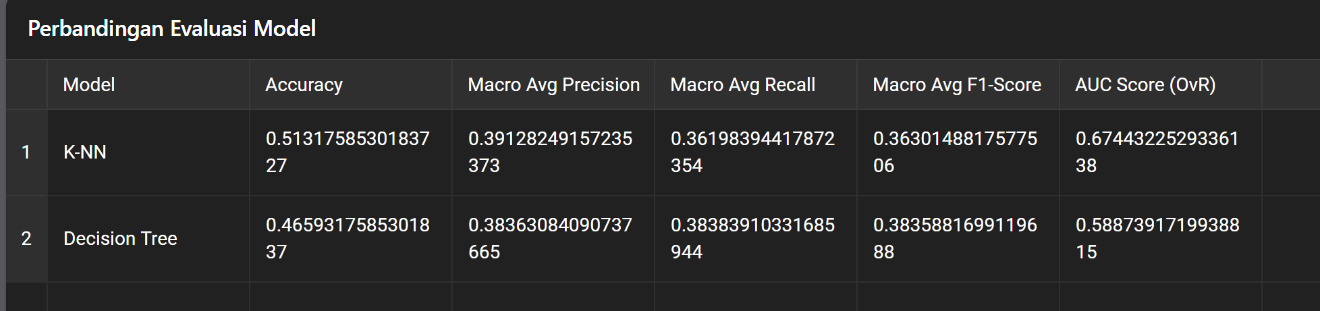

Pada hasil yang sudah ditampilkan, berikut kesimpulan hasil dari setiap evaluasi model:

1. K-NN (51.3%) lebih tinggi dibanding Decision Tree (46.6%)

2. K-NN unggul dalam precision dan AUC Score, menunjukkan bahwa prediksinya lebih andal dalam memisahkan kelas


3. Decision Tree memiliki recall dan macro F1-score yang sedikit lebih baik, artinya lebih sensitif terhadap minoritas kelas (walau trade-off dengan akurasi keseluruhan)

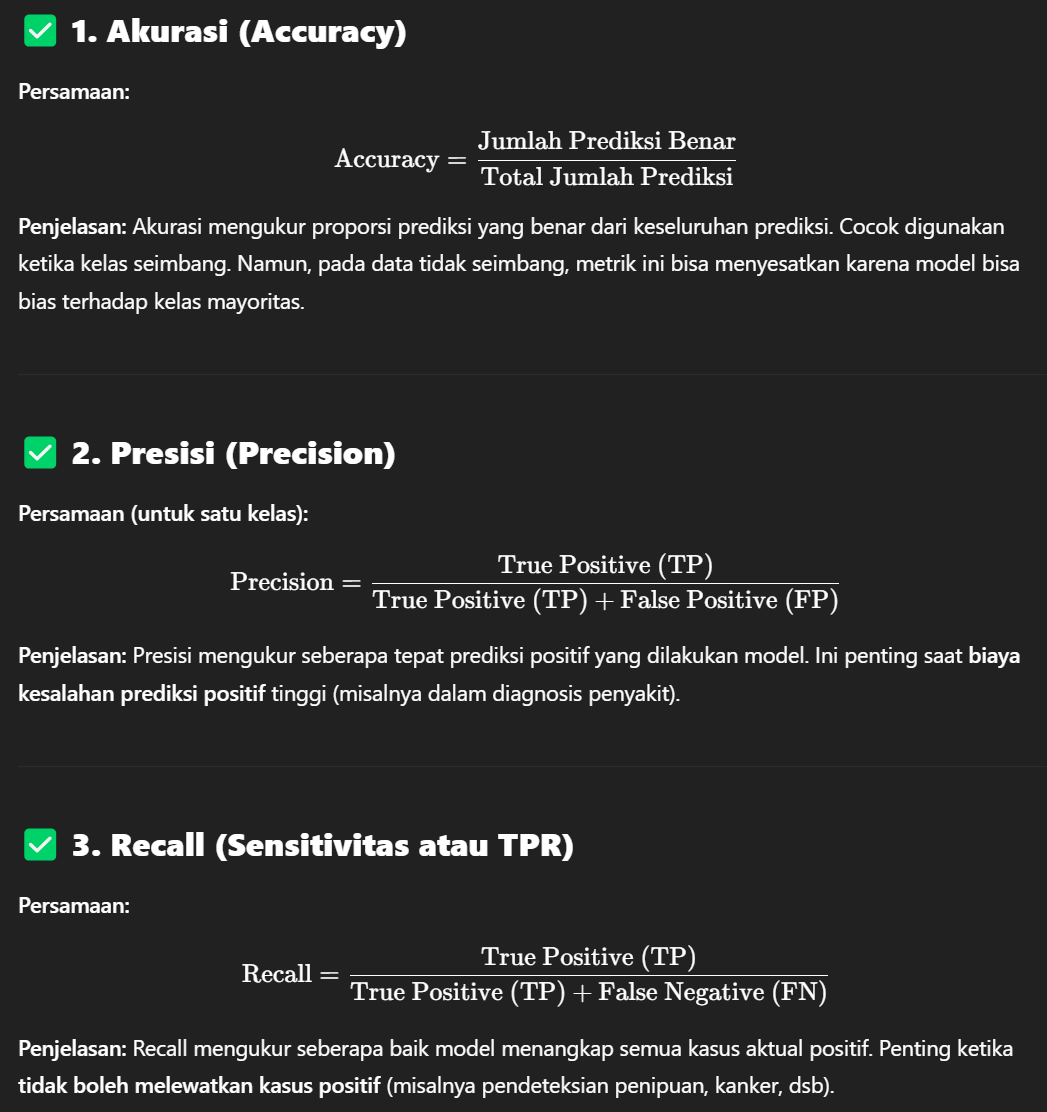

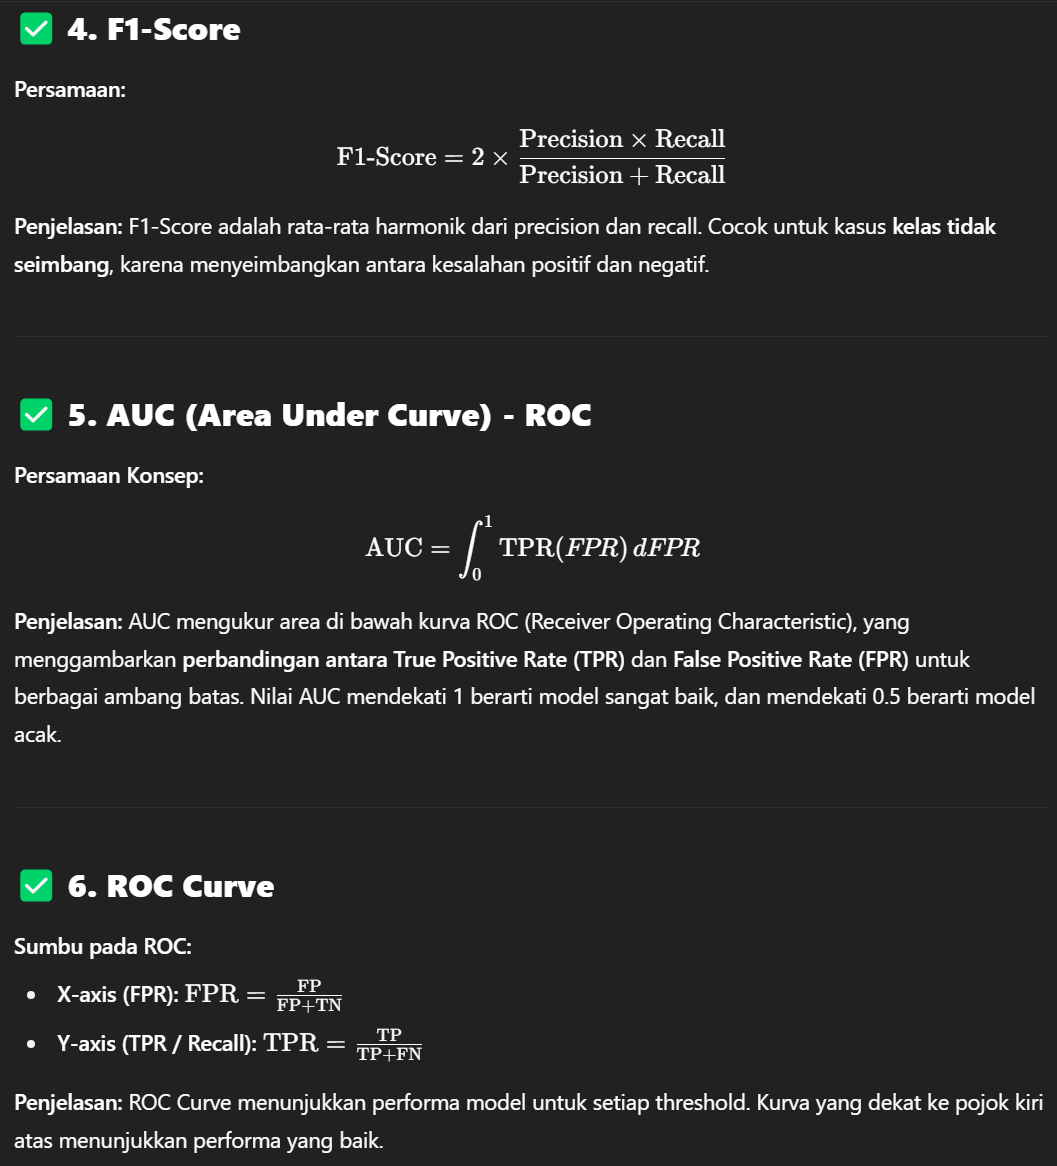